# WebFM API Demo

## Imports

In [1]:
# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Numerics
import numpy as np

# WebFM API
import webfm

## Brain & Geometry APIs

In [2]:
subject = 'PY16N011'

# Get data from the API
subject_brain = webfm.get_brain( subject )
subject_geometry = webfm.get_geometry( subject, webfm_location = 'http://zappa.neuro.jhu.edu:8080' )

In [3]:
# Deduce X and Y coordinates from the geometry object
brain_width = subject_brain.shape[1]
brain_height = subject_brain.shape[0]

# Filter out only electrodes that have u and v coordinates
good_electrodes = [ electrode
                    for electrode, point in subject_geometry.items()
                    if 'u' in point and 'v' in point ]

# Note that the definition of v-coordinates is inverted; kinda lame, I know
electrodes_x = [ brain_width * subject_geometry[electrode]['u']
                 for electrode in good_electrodes ]
electrodes_y = [ brain_height * (1 - subject_geometry[electrode]['v'])
                 for electrode in good_electrodes ]

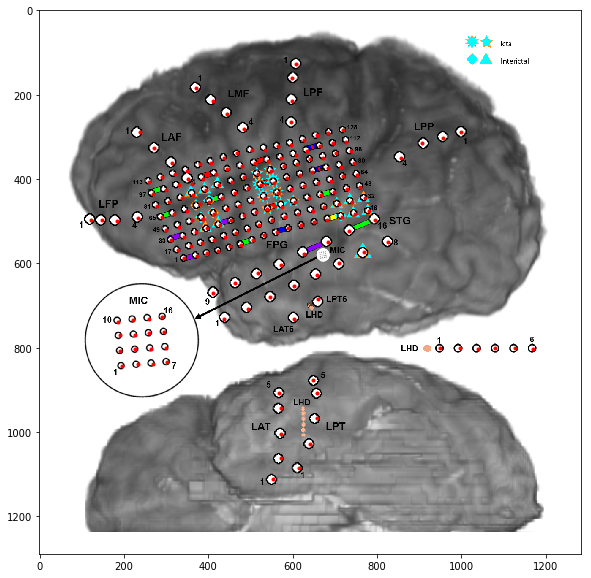

In [4]:
plt.figure( figsize = (20, 10 ) )
plt.imshow( subject_brain )

plt.plot( electrodes_x, electrodes_y, 'r.' )